# EDA

## Challenge 1

+ Forecast hourly energy offers for each of the power plant.

+ Your forecasts will cover the period from June 1, 2024, at 23:00 to June 29, 2024, at 23:00.

+ Evaluated using Mean Absolute Percentage Error (MAPE) and Mean Absolute Error (MAE), calculated for each plant’s time series and then averaged across all plants.

####    Output Format:

Produce a CSV file with three columns:

+ Codigo (plant identifier)

+ fechaHora (timestamp)

+ Energia (forecasted energy offer)

In [440]:
# importing the libs 

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [441]:
# load the data

## This file contains historical data from around March to May 2024.
df_omie_labelled = pd.read_csv('../datasets/df_omie_labelled.csv')

# ---------------------
## Contains information on the technology type (Wind or Solar) for each plant, 
## which may be useful for grouping. 

df_filtered_cat = pd.read_csv('../datasets/filtered_categories.csv')

# ---------------------
## Additional information about generation units that you can use if needed.

df_unit_list = pd.read_csv('../datasets/unit_list.csv')

In [442]:
# ------Quick View at the df - df_omie_labelled --------------

print(f"The shape of the df is {df_omie_labelled.shape}")

print("----------------------------------------------")

print(f"The list of the cols in this df are {df_omie_labelled.columns}")

print("----------------------------------------------")

print(f"The head of the df is {df_omie_labelled.head()}")

print("----------------------------------------------")

print(f"The tail of the df is {df_filtered_cat.tail()}")

print("----------------------------------------------")

print("\nThe data types of the cols are \n", df_omie_labelled.dtypes)

print("----------------------------------------------")

print("The missing values in the df are \n", df_omie_labelled.isnull().sum())

print("----------------------------------------------")

print("The percentqge of missing values in the df are \n", df_omie_labelled.isnull().mean())

print("----------------------------------------------")

print("The unique values in the df are \n", df_omie_labelled.nunique())

The shape of the df is (712264, 5)
----------------------------------------------
The list of the cols in this df are Index(['Codigo', 'Descripcion', 'fechaHora', 'PrecEuro', 'Energia'], dtype='object')
----------------------------------------------
The head of the df is     Codigo                  Descripcion            fechaHora  PrecEuro  \
0  ADXVD03                   PV ALARCOS  2024-02-29 00:00:00      0.00   
1  ALDRE02     FV INSTALACION MAYOR 1MW  2024-02-29 00:00:00      0.00   
2  ASIVD06  SOLAR FV MAYOR O IGUAL 5 MW  2024-02-29 00:00:00      0.00   
3  CEVD003      TARIFA FOTOVOLTAICA <10  2024-02-29 00:00:00      0.00   
4  CEVD209      STO. CRISTO DE MAGALLON  2024-02-29 00:00:00     -0.01   

   Energia  
0      0.0  
1      0.0  
2     46.2  
3      0.0  
4     37.0  
----------------------------------------------
The tail of the df is      Categoria   Codigo
1292     Solar  WMVD209
1293     Solar  WMVD210
1294     Solar  WMVD211
1295     Solar  ZRMRE01
1296     Solar  

In [443]:
# Count the number of zeros in the Energia column
zero_count = df_omie_labelled['Energia'].eq(0).sum()

# Calculate the percentage of zeros in the total Energia column
total_count = len(df_omie_labelled['Energia'])
zero_percentage = (zero_count / total_count) * 100

print(f"Number of zeros in Energia: {zero_count}")
print(f"Percentage of zeros in Energia: {zero_percentage:.2f}%")

Number of zeros in Energia: 154165
Percentage of zeros in Energia: 21.64%


Key Variables:

+ Codigo: A unique identifier for each power plant.
+ fechaHora: The timestamp for each offer.
+ PrecEuro: The price at which the energy is offered.
+ Energia: The total energy offered.

In [444]:
# ------Quick View at the dfs - df_filtered_cat--------------

print(f"The shape of the df is {df_filtered_cat.shape}")

print("----------------------------------------------")

print(f"The list of the cols in this df are {df_filtered_cat.columns}")

print("----------------------------------------------")

print(f"The head of the df is {df_filtered_cat.head()}")

print("----------------------------------------------")

print(f"The tail of the df is {df_filtered_cat.tail()}")

print("----------------------------------------------")

print("\nThe data types of the cols are \n", df_filtered_cat.dtypes)

print("----------------------------------------------")

print("The missing values in the df are \n", df_filtered_cat.isnull().sum())

print("----------------------------------------------")

print("The percentqge of missing values in the df are \n", df_filtered_cat.isnull().mean())

print("----------------------------------------------")

print("The unique values in the df are \n", df_filtered_cat.nunique())

The shape of the df is (1297, 2)
----------------------------------------------
The list of the cols in this df are Index(['Categoria', 'Codigo'], dtype='object')
----------------------------------------------
The head of the df is   Categoria   Codigo
0    Eolica  ADXVD04
1    Eolica  CEVD053
2    Eolica  CEVD054
3    Eolica  CEVD209
4    Eolica  CEVD234
----------------------------------------------
The tail of the df is      Categoria   Codigo
1292     Solar  WMVD209
1293     Solar  WMVD210
1294     Solar  WMVD211
1295     Solar  ZRMRE01
1296     Solar  ZRMRE03
----------------------------------------------

The data types of the cols are 
 Categoria    object
Codigo       object
dtype: object
----------------------------------------------
The missing values in the df are 
 Categoria    0
Codigo       0
dtype: int64
----------------------------------------------
The percentqge of missing values in the df are 
 Categoria    0.0
Codigo       0.0
dtype: float64
------------------------

In [445]:
# ------Quick View at the df - df_unit_list ---------------

print(f"The shape of the df is {df_unit_list.shape}")

print("----------------------------------------------")

print(f"The list of the cols in this df are {df_unit_list.columns}")

print("----------------------------------------------")

print(f"The head of the df is {df_unit_list.head()}")

print("----------------------------------------------")

print(f"The tail of the df is {df_unit_list.tail()}")

print("----------------------------------------------")

print("\nThe data types of the cols are \n", df_unit_list.dtypes)

print("----------------------------------------------")

print("The missing values in the df are \n", df_unit_list.isnull().sum())

print("----------------------------------------------")

print("The percentqge of missing values in the df are \n", df_unit_list.isnull().mean())

print("----------------------------------------------")

print("The unique values in the df are \n", df_unit_list.nunique())

The shape of the df is (3283, 7)
----------------------------------------------
The list of the cols in this df are Index(['Codigo', 'Descripción', 'Agente', 'Porcentaje_Propiedad',
       'Tipo_Unidad', 'Zona/Frontera', 'Tecnología'],
      dtype='object')
----------------------------------------------
The head of the df is     Codigo                    Descripción                          Agente  \
0  AFIBGEC          ALMACENAMIENTO COMPRA  IBERDROLA ENERGÍA ESPAÑA S..A.   
1  AFIBHEC  COMPRA HIBRIDACION EOLICA BAT  IBERDROLA ENERGÍA ESPAÑA S..A.   
2  AFIBHFC  COMPRA HIBRIDACION FV BATERIA  IBERDROLA ENERGÍA ESPAÑA S..A.   
3  ACAVADB               BOMBAS DO CAVADO           EDP GEM PORTUGAL S.A.   
4  ADOUROB                 BOMBA DO DOURO           EDP GEM PORTUGAL S.A.   

   Porcentaje_Propiedad     Tipo_Unidad    Zona/Frontera  \
0                 100.0  ALMACENAMIENTO    ZONA ESPAÑOLA   
1                 100.0  ALMACENAMIENTO    ZONA ESPAÑOLA   
2                 100.0  ALMAC

## EDA on each dataset

### 1. df_omie_labelled

The unique values in the df are: 
    
+ Codigo          1069
+ Descripcion     1044
+ fechaHora       2254
+ PrecEuro        1865
+ Energia        10916


In [446]:
df_omie_labelled.head()

,Codigo,Descripcion,fechaHora,PrecEuro,Energia
0,ADXVD03,PV ALARCOS,2024-02-29 00:00:00,0.00,0.0
1,ALDRE02,FV INSTALACION MAYOR 1MW,2024-02-29 00:00:00,0.00,0.0
2,ASIVD06,SOLAR FV MAYOR O IGUAL 5 MW,2024-02-29 00:00:00,0.00,46.2
3,CEVD003,TARIFA FOTOVOLTAICA <10,2024-02-29 00:00:00,0.00,0.0
4,CEVD209,STO. CRISTO DE MAGALLON,2024-02-29 00:00:00,-0.01,37.0


In [447]:
df_omie_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712264 entries, 0 to 712263
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Codigo       712264 non-null  object 
 1   Descripcion  703248 non-null  object 
 2   fechaHora    703248 non-null  object 
 3   PrecEuro     703248 non-null  float64
 4   Energia      703248 non-null  float64
dtypes: float64(2), object(3)
memory usage: 27.2+ MB


In [448]:
df_omie_labelled.describe().T

,count,mean,std,min,25%,50%,75%,max
PrecEuro,703248.0,-2.745860,46.554669,-500.0,-0.63,0.0,0.0,1000.0
Energia,703248.0,37.838135,129.486894,0.0,0.50,12.3,32.4,5047.0


+ PrecEuro has negative vals. 

In [449]:
df_omie_labelled['Codigo'].nunique()

9328

In [450]:
# 1. Converting the fechaHora to datetime

df_omie_labelled["fechaHora"] = pd.to_datetime(df_omie_labelled["fechaHora"])

date_range = df_omie_labelled["fechaHora"].min(), df_omie_labelled["fechaHora"].max()
print()
print("Date Range:", date_range)

df_omie_labelled["date"] = df_omie_labelled["fechaHora"].dt.date
df_omie_labelled["hour"] = df_omie_labelled["fechaHora"].dt.hour
df_omie_labelled["week"] = df_omie_labelled["fechaHora"].dt.isocalendar().week


Date Range: (Timestamp('2024-02-29 00:00:00'), Timestamp('2024-06-01 22:00:00'))


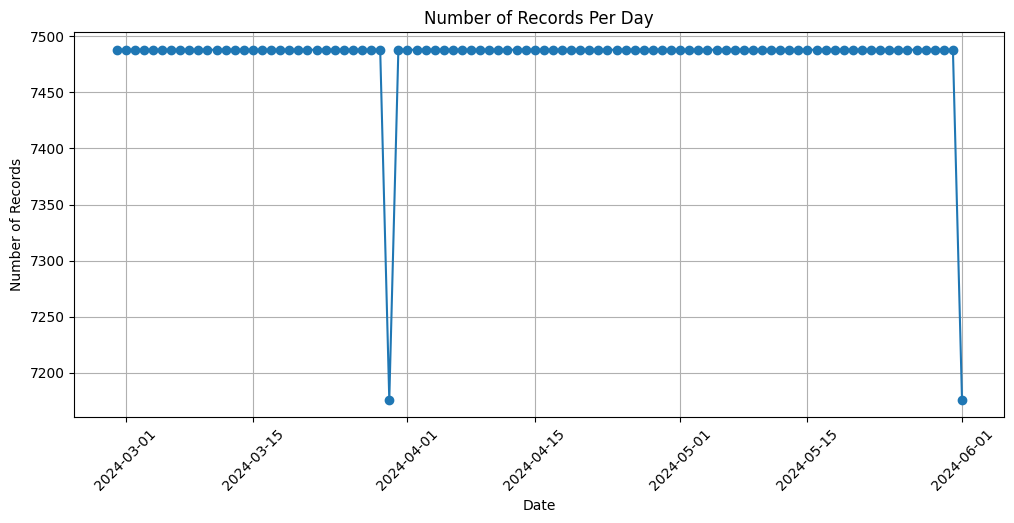

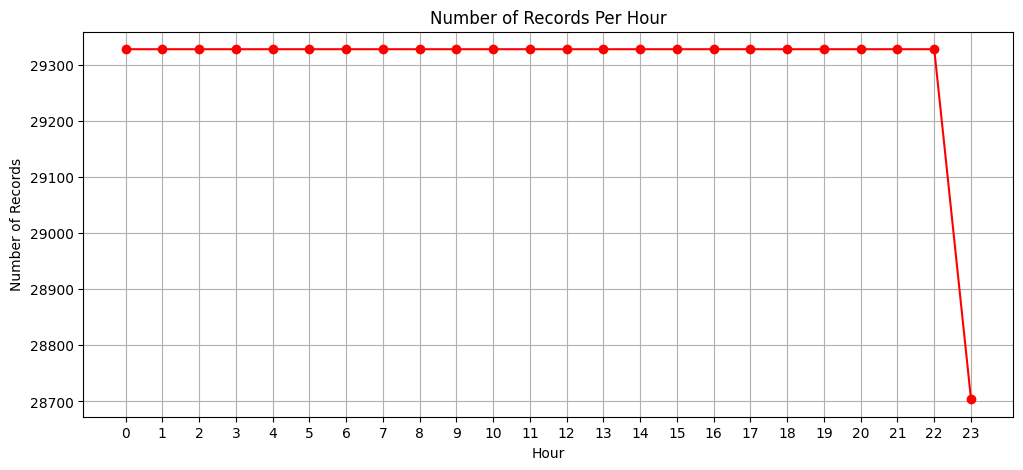

In [451]:
# Aggregations

# Daily counts

daily_counts = df_omie_labelled.groupby("date").size()


plt.figure(figsize=(12, 5))
plt.plot(daily_counts.index, daily_counts.values, marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Number of Records")
plt.title("Number of Records Per Day")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Hourly counts
hourly_counts = df_omie_labelled.groupby("hour").size()

plt.figure(figsize=(12, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker="o", linestyle="-", color="red")
plt.xlabel("Hour")
plt.ylabel("Number of Records")
plt.title("Number of Records Per Hour")
plt.xticks(range(24))
plt.grid()
plt.show()

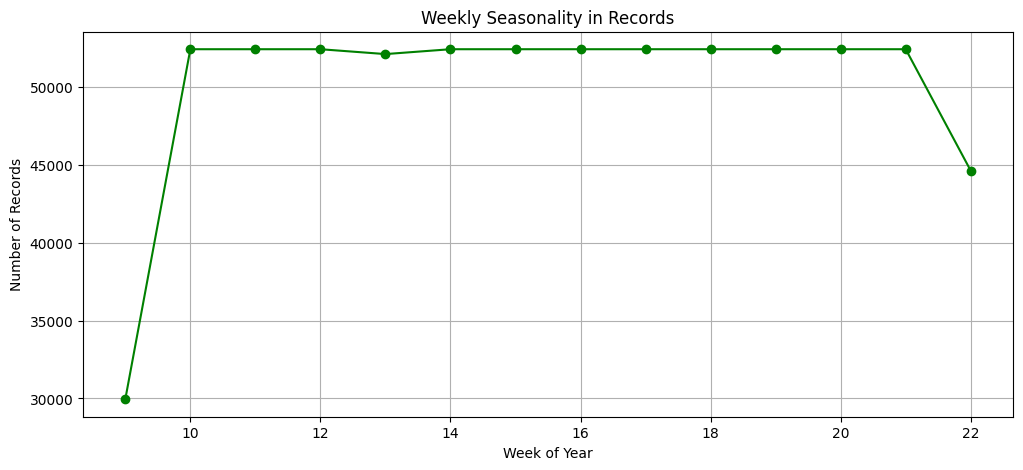

In [452]:
weekly_counts = df_omie_labelled.groupby("week").size()

# Plot weekly seasonality
plt.figure(figsize=(12, 5))
plt.plot(weekly_counts.index, weekly_counts.values, marker="o", linestyle="-", color="green")
plt.xlabel("Week of Year")
plt.ylabel("Number of Records")
plt.title("Weekly Seasonality in Records")
plt.grid()
plt.show()

In [453]:
# # Grouping by Codigo and fechaHora to analyze energy offers and prices

df_grouped = df_omie_labelled.groupby(["Codigo", df_omie_labelled["fechaHora"].dt.date]) \
    .agg({"PrecEuro": "mean", "Energia": "sum"}).reset_index()

df_grouped.head()

,Codigo,fechaHora,PrecEuro,Energia
0,ADXVD03,2024-02-29,-0.054167,1809.3
1,ADXVD03,2024-03-01,-0.054167,852.8
2,ADXVD03,2024-03-02,-0.054167,1429.5
3,ADXVD03,2024-03-03,-0.054167,893.6
4,ADXVD03,2024-03-04,-0.054167,1886.3


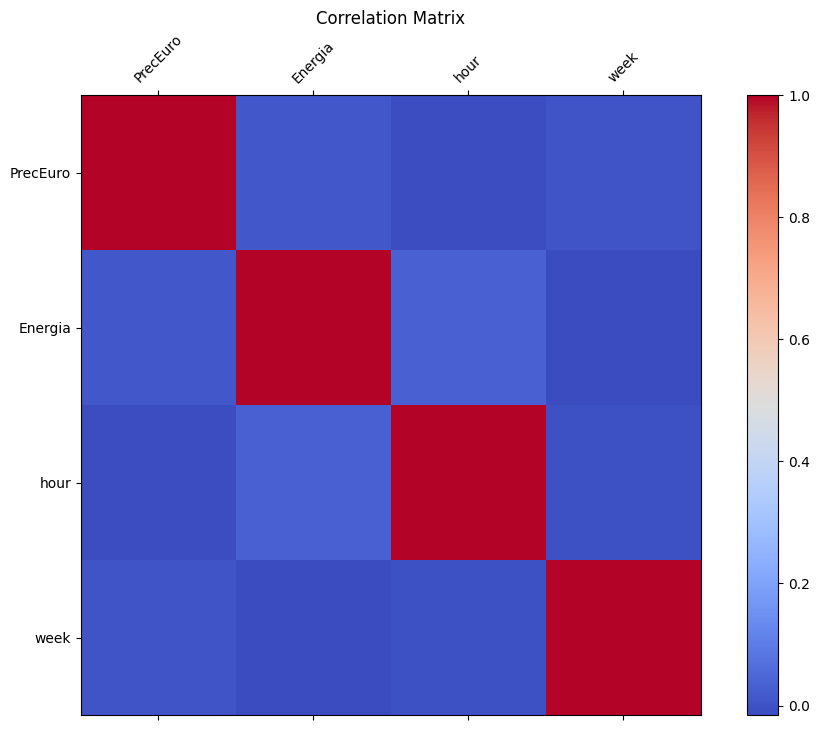

In [454]:
# correlation matrix 

numerical_cols = df_omie_labelled.select_dtypes(include=[np.number]).columns

corr_matrix = df_omie_labelled[numerical_cols].corr()

plt.figure(figsize=(12, 8))
plt.matshow(corr_matrix, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


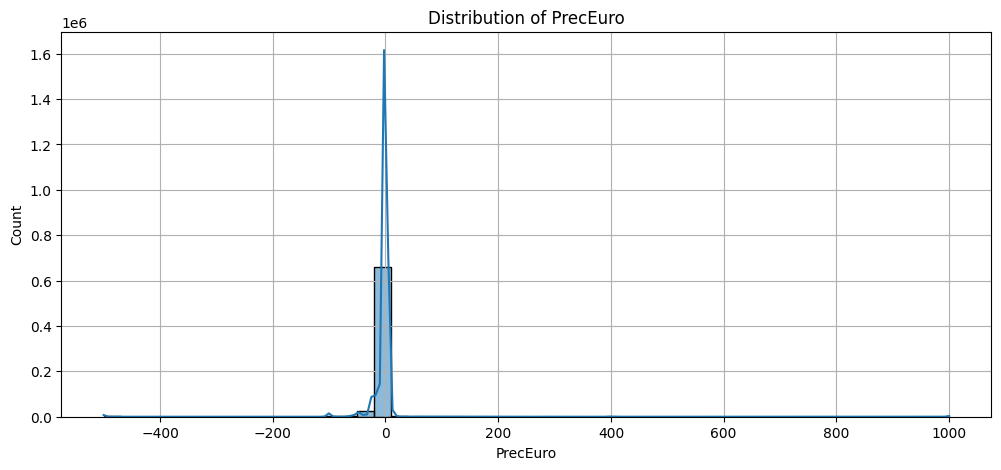

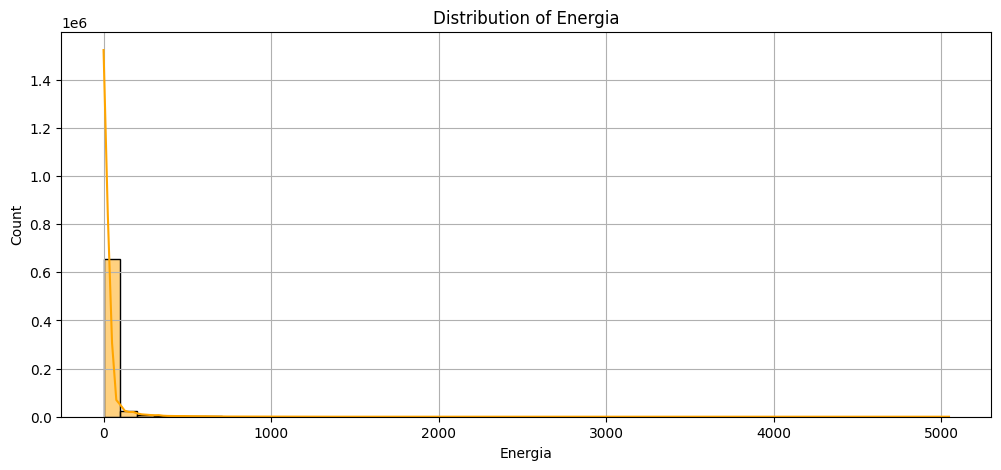

In [455]:
# Distribution and Outlier Analysis
# Histograms
plt.figure(figsize=(12, 5))
sns.histplot(df_omie_labelled["PrecEuro"], bins=50, kde=True)
plt.xlabel("PrecEuro")
plt.title("Distribution of PrecEuro")
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df_omie_labelled["Energia"], bins=50, kde=True, color="orange")
plt.xlabel("Energia")
plt.title("Distribution of Energia")
plt.grid()
plt.show()

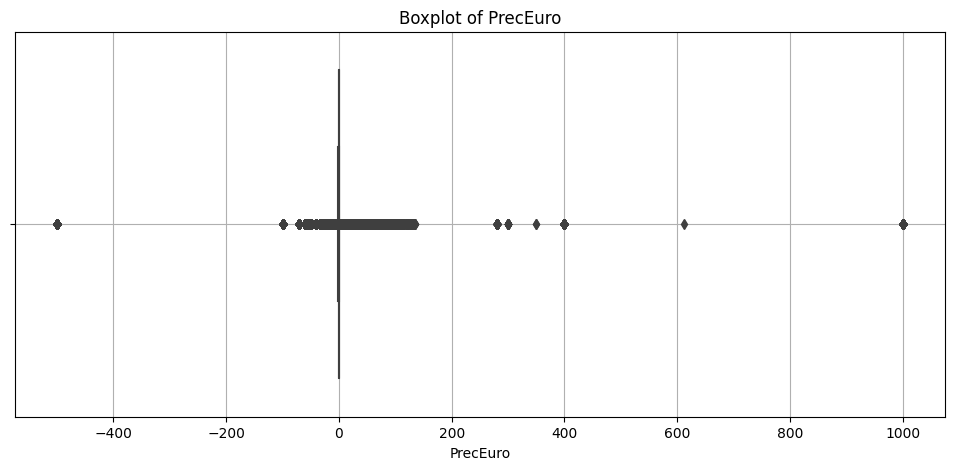

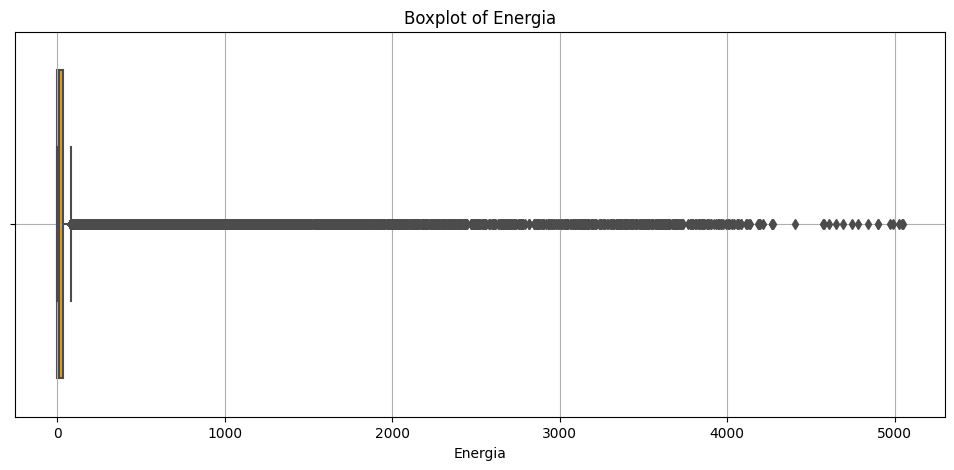

In [456]:
# Boxplots

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_omie_labelled["PrecEuro"])
plt.title("Boxplot of PrecEuro")
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_omie_labelled["Energia"], color="orange")
plt.title("Boxplot of Energia")
plt.grid()
plt.show()


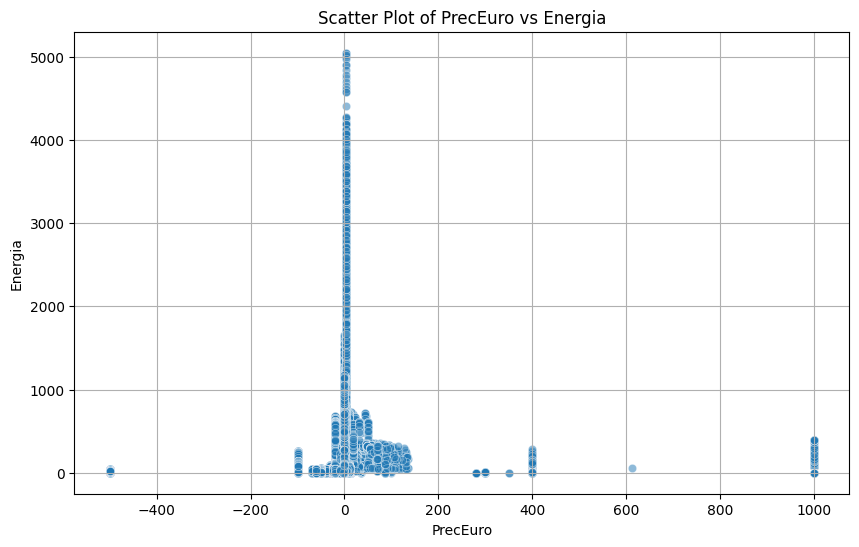

In [457]:
# Scatter plot to analyze relationship between PrecEuro and Energia
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_omie_labelled["PrecEuro"], y=df_omie_labelled["Energia"], alpha=0.5)
plt.xlabel("PrecEuro")
plt.ylabel("Energia")
plt.title("Scatter Plot of PrecEuro vs Energia")
plt.grid()
plt.show()

### Aggregated Metrics by Plant:

In [458]:
df_aggregated = df_omie_labelled.groupby("Codigo").agg(
    avg_energy=("Energia", "mean"),
    total_bids=("Codigo", "count"),
    avg_price=("PrecEuro", "mean")
).reset_index()



In [459]:
print(df_aggregated.head())

print(df_aggregated.tail())


    Codigo  avg_energy  total_bids  avg_price
0  ADXVD03   78.237178        2254 -32.326309
1  ALDRE02    9.292192        2254  -0.421633
2  ASIVD06   44.220896        2254   0.621118
3  CEVD003   15.021783        2254 -27.373558
4  CEVD209   16.401331        2254  -0.145217
       Codigo  avg_energy  total_bids  avg_price
9323  WMVD101    8.140816        2254  -0.433563
9324  WMVD147   10.647870        2254  -0.437369
9325  WMVD166   13.367480        2254  -2.371571
9326  WMVD189   21.101375        2254  -2.177724
9327  WMVD193   50.333452        2254  -0.032582


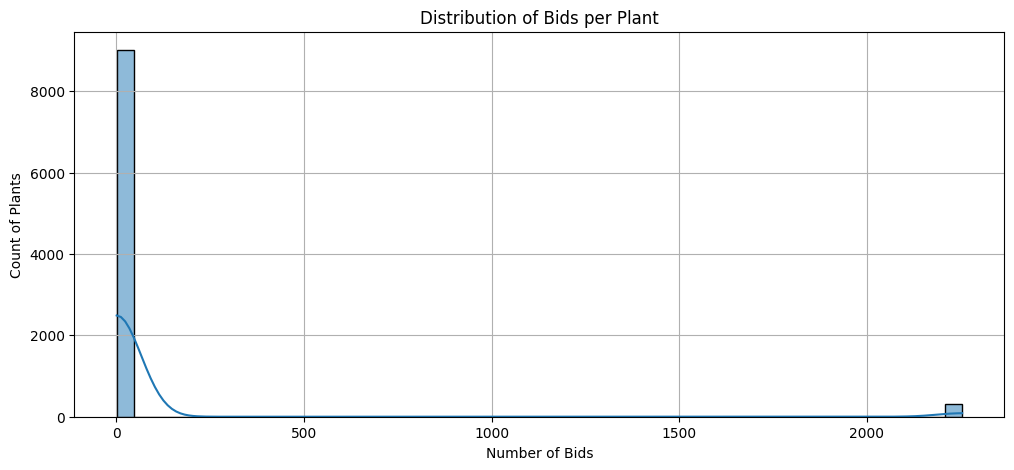

In [460]:
# Plot distribution of bids per plant
plt.figure(figsize=(12, 5))
sns.histplot(df_aggregated["total_bids"], bins=50, kde=True)
plt.xlabel("Number of Bids")
plt.ylabel("Count of Plants")
plt.title("Distribution of Bids per Plant")
plt.grid()
plt.show()



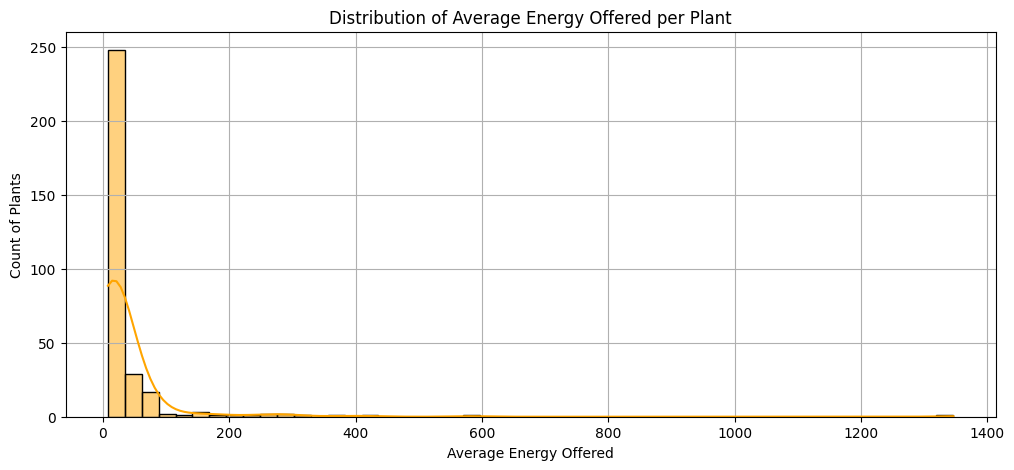

In [461]:
# Plot distribution of energy offered per plant

plt.figure(figsize=(12, 5))
sns.histplot(df_aggregated["avg_energy"], bins=50, kde=True, color="orange")
plt.xlabel("Average Energy Offered")
plt.ylabel("Count of Plants")
plt.title("Distribution of Average Energy Offered per Plant")
plt.grid()
plt.show()


### 2. df_filtered_cat


The unique values in the df are 

+ Categoria       2

+ Codigo       1297

In [462]:
df_filtered_cat.tail()  


,Categoria,Codigo
1292,Solar,WMVD209
1293,Solar,WMVD210
1294,Solar,WMVD211
1295,Solar,ZRMRE01
1296,Solar,ZRMRE03


In [463]:
df_filtered_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Categoria  1297 non-null   object
 1   Codigo     1297 non-null   object
dtypes: object(2)
memory usage: 20.4+ KB


In [464]:
unique_categories = df_filtered_cat["Categoria"].unique()
category_counts = df_filtered_cat["Categoria"].value_counts()

print("Unique Categories:", unique_categories)
print("Category Counts:", category_counts)

Unique Categories: ['Eolica' 'Solar']
Category Counts: Categoria
Solar     923
Eolica    374
Name: count, dtype: int64


In [465]:
# Overview of Codigo entries

unique_codigos = df_filtered_cat["Codigo"].nunique()
duplicate_codigos = df_filtered_cat["Codigo"].duplicated().sum()

print("\nUnique Codigo Entries:", unique_codigos)
print("\nNumber of Duplicate Codigos:", duplicate_codigos)



Unique Codigo Entries: 1297

Number of Duplicate Codigos: 0


In [466]:
duplicates_df = df_filtered_cat[df_filtered_cat.duplicated(subset=["Codigo"], keep=False)]
print("Number of Duplicates:", duplicates_df.shape[0])

Number of Duplicates: 0


In [467]:

# codigo matching to a single category 

codigo_category_mapping = df_filtered_cat.groupby("Codigo")["Categoria"].nunique()
codigo_with_multiple_categories = codigo_category_mapping[codigo_category_mapping > 1]

# compare Codigo list in df_filtered_cat with df_omie_labelled

common_codigos = set(df_filtered_cat["Codigo"]).intersection(set(df_omie_labelled["Codigo"]))
missing_codigos_in_offers = set(df_filtered_cat["Codigo"]) - set(df_omie_labelled["Codigo"])
missing_codigos_in_filtered = set(df_omie_labelled["Codigo"]) - set(df_filtered_cat["Codigo"])


In [468]:
print("Codigos Mapping to Multiple Categories:", len(codigo_with_multiple_categories))
print("Common Codigos Between Both Datasets:", len(common_codigos))
print("Codigos in df_filtered_cat Missing in Offers:", len(missing_codigos_in_offers))
print("Codigos in df_omie_labelled Missing in df_filtered_cat:", len(missing_codigos_in_filtered))

Codigos Mapping to Multiple Categories: 0
Common Codigos Between Both Datasets: 312
Codigos in df_filtered_cat Missing in Offers: 985
Codigos in df_omie_labelled Missing in df_filtered_cat: 9016


####    Insights on Codigos 

+ No inconsistencies for each of the Codigo maps to a single Categoria (good data integrity).

+ Codigos in df_filtered_cat Missing in df_omie_labelled is 228. This means these plants may exist in the dataset but have no historical energy offers.

+  All Codigo from df_omie_labelled exist in df_filtered_cat (good coverage).

In [469]:
# If there are Codigo entries with multiple categories :- 

if not codigo_with_multiple_categories.empty:
    print("\nCodigos Mapping to Multiple Categories:")
    print(codigo_with_multiple_categories)

# Missing Codigo lists

if missing_codigos_in_offers:
    print("\nExample Codigos in df_filtered_cat Missing in df_omie_labelled:")
    print(list(missing_codigos_in_offers)[:10])

if missing_codigos_in_filtered:
    print("\nExample Codigos in df_omie_labelled Missing in df_filtered_cat:")
    print(list(missing_codigos_in_filtered)[:10])


Example Codigos in df_filtered_cat Missing in df_omie_labelled:
['CEVD420', 'GALVD10', 'GESVD33', 'GNVD168', 'GALPVD1', 'IM3RE01', 'EGVD098', 'CEVD354', 'E21VD01', 'BSGRE01']

Example Codigos in df_omie_labelled Missing in df_filtered_cat:
['IGVD133,"MONEGROS SOLAR, S.A.",2024-03-10 22:00:00,0.0,0.0', 'IGVD133,"MONEGROS SOLAR, S.A.",2024-03-24 13:00:00,-3.8,22.2', 'IGVD129,"MOLINOS DEL EBRO, S.A.",2024-04-15 18:00:00,0.0,259.3', 'IGVD130,"MOLINOS DEL JALÓN, S.A.",2024-04-18 20:00:00,-0.13,6.0', 'IGVD133,"MONEGROS SOLAR, S.A.",2024-05-20 06:00:00,0.0,0.0', 'IGVD130,"MOLINOS DEL JALÓN, S.A.",2024-04-11 12:00:00,-0.1,0.8', 'IGVD133,"MONEGROS SOLAR, S.A.",2024-04-02 17:00:00,-3.8,30.0', 'IGVD133,"MONEGROS SOLAR, S.A.",2024-04-29 11:00:00,-0.13,19.1', 'IGVD129,"MOLINOS DEL EBRO, S.A.",2024-04-30 19:00:00,0.0,174.5', 'IGVD130,"MOLINOS DEL JALÓN, S.A.",2024-04-11 09:00:00,-0.1,3.4']


#### Insightz

+ Why are 228 Codigo from df_filtered_cat missing in df_omie_labelled?

+ Are these new plants that have not made any offers yet?

+ Are they inactive plants that used to make offers but stopped?


In [470]:
# check if these missing Codigos exist in another dataset

missing_codigos_df = df_filtered_cat[df_filtered_cat["Codigo"].isin(missing_codigos_in_offers)]
print(missing_codigos_df)

     Categoria   Codigo
0       Eolica  ADXVD04
1       Eolica  CEVD053
2       Eolica  CEVD054
5       Eolica  CEVD266
7       Eolica  CEVD281
...        ...      ...
1292     Solar  WMVD209
1293     Solar  WMVD210
1294     Solar  WMVD211
1295     Solar  ZRMRE01
1296     Solar  ZRMRE03

[985 rows x 2 columns]


### 3. df_unit_list

In [471]:
df_unit_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Codigo                3283 non-null   object 
 1   Descripción           2119 non-null   object 
 2   Agente                2119 non-null   object 
 3   Porcentaje_Propiedad  2119 non-null   float64
 4   Tipo_Unidad           2119 non-null   object 
 5   Zona/Frontera         2119 non-null   object 
 6   Tecnología            2119 non-null   object 
dtypes: float64(1), object(6)
memory usage: 179.7+ KB


In [472]:
df_unit_list.tail()

,Codigo,Descripción,Agente,Porcentaje_Propiedad,Tipo_Unidad,Zona/Frontera,Tecnología
3278,"LAUCVX1,PORFOLIO VENTA COMER,""LA UNIÓN ELECTRO...",NaN,NaN,NaN,NaN,NaN,NaN
3279,SECPCX1,PORTFOLIO BUY,SECOND FOUNDATION ENERGY AS,100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Produccion Compra
3280,SECPVX1,PORTFOLIO SELL,SECOND FOUNDATION ENERGY AS,100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Produccion Venta
3281,SWACCX1,SWACCX1,SWAP ENERGIA S.A,100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Comerc. Compra
3282,SWACVX1,SWACVX1,SWAP ENERGIA S.A,100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Comerc. Venta


In [473]:
df_unit_list.columns

Index(['Codigo', 'Descripción', 'Agente', 'Porcentaje_Propiedad',
       'Tipo_Unidad', 'Zona/Frontera', 'Tecnología'],
      dtype='object')

In [474]:
df_unit_list.describe().T

,count,mean,std,min,25%,50%,75%,max
Porcentaje_Propiedad,2119.0,99.742547,4.311691,11.292,100.0,100.0,100.0,100.0


In [475]:
print("\nRandom Sample of 5 Rows:")

df_unit_list.sample(5)


Random Sample of 5 Rows:


,Codigo,Descripción,Agente,Porcentaje_Propiedad,Tipo_Unidad,Zona/Frontera,Tecnología
2434,IGVD171,UOF VILLANUEVA 2,IGNIS ENERGIA S.L.,100.0,GENERACION,ZONA ESPAÑOLA,RE Mercado Solar Fotovoltáica
1204,DETVD03,VENTA PRODUCTOR DETIC,CEPSA GAS Y ELECTRICIDAD SAU,100.0,GENERACION,ZONA ESPAÑOLA,RE Mercado Térmica no Renovab.
1729,"EGVD494,UOF COLMENA SUN BAECIENCE,""AXPO IBERIA...",NaN,NaN,NaN,NaN,NaN,NaN
490,NEASC01,INTRADAY TRADING,CENTRICA ENERGY TRADING AS,100.0,COMERCIALIZADOR,ZONA ESPAÑOLA,Comercializador
2254,"HISVD27,CORTIJO GUER,""ALPIQ ENERGÍA ESPAÑA, S....",NaN,NaN,NaN,NaN,NaN,NaN


In [476]:
print("\nMissing Values per Column:")
print(df_unit_list.isnull().sum())


Missing Values per Column:
Codigo                     0
Descripción             1164
Agente                  1164
Porcentaje_Propiedad    1164
Tipo_Unidad             1164
Zona/Frontera           1164
Tecnología              1164
dtype: int64


In [477]:
# cat cols 

print("----------------------------------------------")


print("\nUnique Values in `Tipo_Unidad`:")
print(df_unit_list["Tipo_Unidad"].value_counts())

print("----------------------------------------------")


print("\nUnique Values in `Zona/Frontera`:")
print(df_unit_list["Zona/Frontera"].value_counts())

print("----------------------------------------------")


print("\nUnique Values in `Tecnología` (Including Missing):")
print(df_unit_list["Tecnología"].value_counts(dropna=False))

print("----------------------------------------------")


print("\nUnique Agentes Count:", df_unit_list["Agente"].nunique())
print("Top 10 Most Frequent Agentes:")
print(df_unit_list["Agente"].value_counts().head(10))

print()
print("----------------------------------------------")

----------------------------------------------

Unique Values in `Tipo_Unidad`:
Tipo_Unidad
GENERACION                        1420
COMERCIALIZADOR                    423
CONSUMIDOR DIRECTO                 145
GENERICA                            86
PORFOLIO                            26
BOMBEO                              14
ALMACENAMIENTO                       3
COMERCIALIZADOR ULTIMO RECURSO       1
DISTRIBUIDOR                         1
Name: count, dtype: int64
----------------------------------------------

Unique Values in `Zona/Frontera`:
Zona/Frontera
ZONA ESPAÑOLA         1977
ZONA PORTUGUESA         90
FRONTERA FRANCIA        48
FRONTERA MARRUECOS       3
FRONTERA ANDORRA         1
Name: count, dtype: int64
----------------------------------------------

Unique Values in `Tecnología` (Including Missing):
Tecnología
NaN                               1164
RE Mercado Solar Fotovoltáica      609
RE Mercado Térmica no Renovab.     282
Comercializador                    246
RE Merca

In [478]:
unique_codigos = df_unit_list["Codigo"].nunique()
codigo_descripcion_duplicates = df_unit_list.duplicated(subset=["Codigo", "Descripción"]).sum()

print("\nUnique Codigo Count:", unique_codigos)
print("Duplicate Codigo-Descripcion Entries:", codigo_descripcion_duplicates)


Unique Codigo Count: 3280
Duplicate Codigo-Descripcion Entries: 3


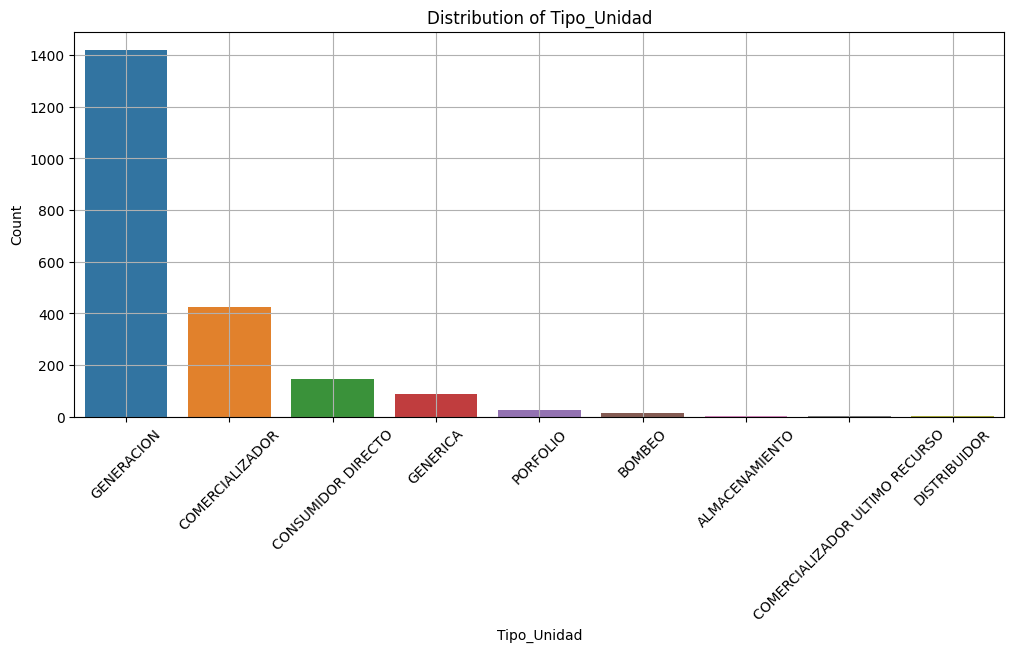

In [479]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df_unit_list["Tipo_Unidad"].value_counts().index, 
            y=df_unit_list["Tipo_Unidad"].value_counts().values)
plt.xticks(rotation=45)
plt.xlabel("Tipo_Unidad")
plt.ylabel("Count")
plt.title("Distribution of Tipo_Unidad")
plt.grid()
plt.show()

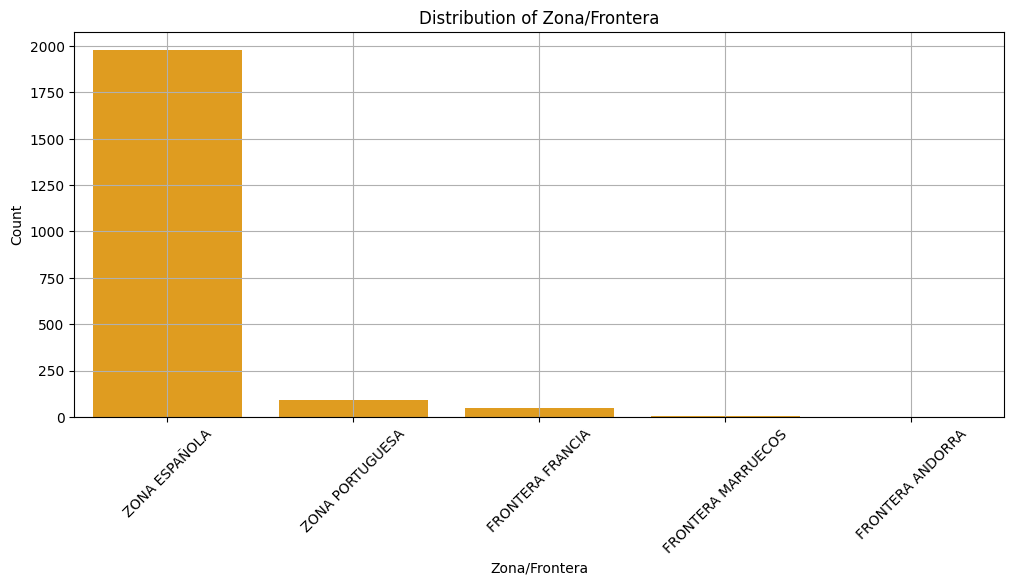

In [480]:
# Bar Chart - Zona/Frontera Counts

plt.figure(figsize=(12, 5))
sns.barplot(x=df_unit_list["Zona/Frontera"].value_counts().index, 
            y=df_unit_list["Zona/Frontera"].value_counts().values, color="orange")
plt.xticks(rotation=45)
plt.xlabel("Zona/Frontera")
plt.ylabel("Count")
plt.title("Distribution of Zona/Frontera")
plt.grid()
plt.show()



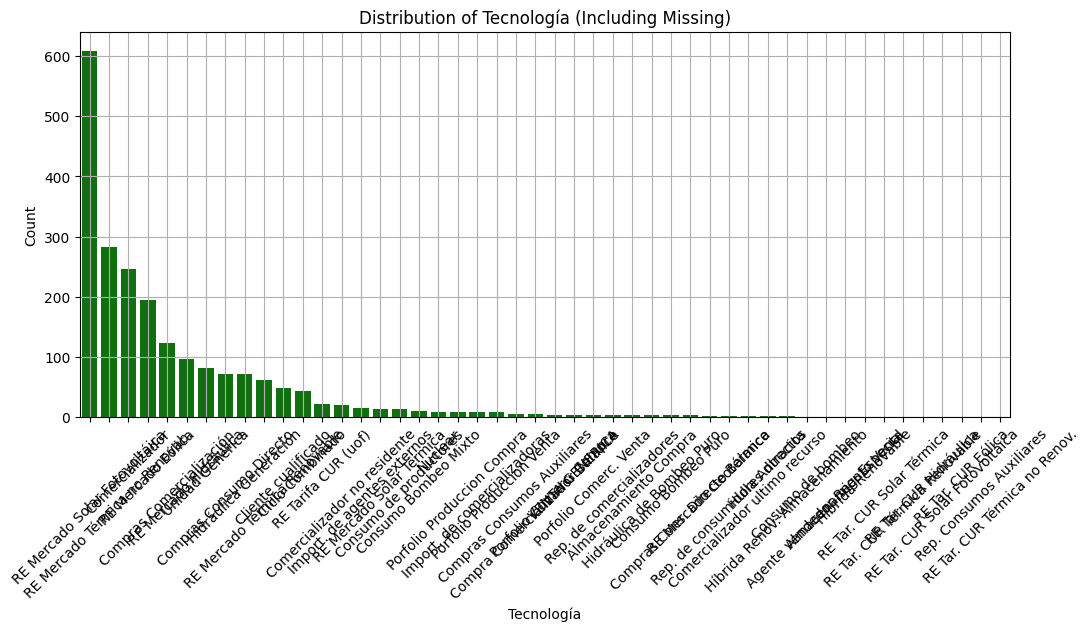

In [481]:
# Bar Chart - Tecnología Counts (Including Missing)
plt.figure(figsize=(12, 5))
sns.barplot(x=df_unit_list["Tecnología"].value_counts(dropna=False).index, 
            y=df_unit_list["Tecnología"].value_counts(dropna=False).values, color="green")
plt.xticks(rotation=45)
plt.xlabel("Tecnología")
plt.ylabel("Count")
plt.title("Distribution of Tecnología (Including Missing)")
plt.grid()
plt.show()


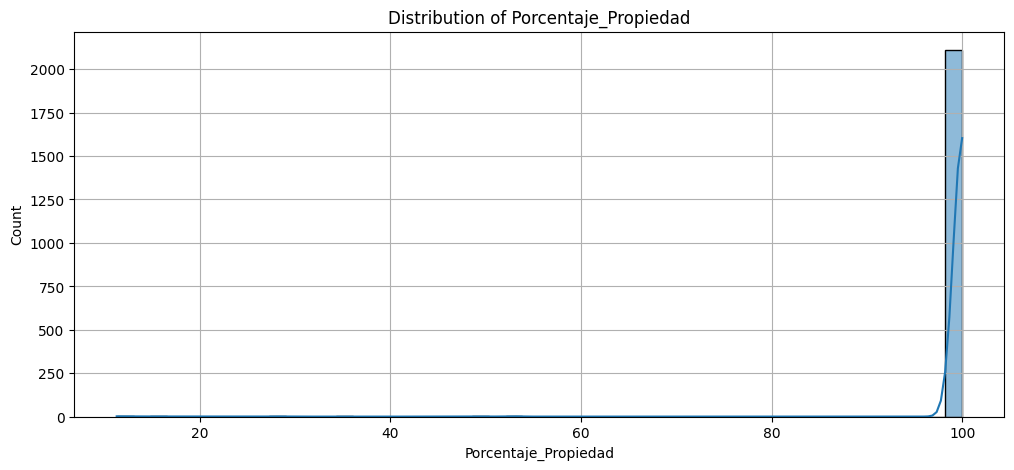

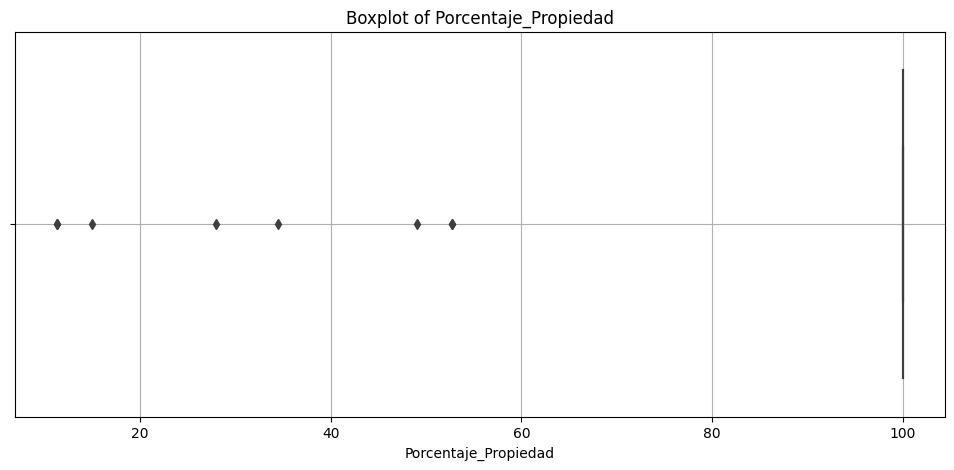

In [482]:
# Distribution n Boxplot of `Porcentaje_Propiedad`

plt.figure(figsize=(12, 5))
sns.histplot(df_unit_list["Porcentaje_Propiedad"], bins=50, kde=True)
plt.xlabel("Porcentaje_Propiedad")
plt.title("Distribution of Porcentaje_Propiedad")
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_unit_list["Porcentaje_Propiedad"])
plt.title("Boxplot of Porcentaje_Propiedad")
plt.grid()
plt.show()


# Feature Eng

### 1. df_omie_labelled

In [483]:
df_omie_labelled.shape

(712264, 8)

### 1. Temp features

In [484]:
# Ensure that fechaHora is of datetime type
df_omie_labelled['fechaHora'] = pd.to_datetime(df_omie_labelled['fechaHora'])

# Day of the week (Monday=0, Sunday=6)
df_omie_labelled['day_of_week'] = df_omie_labelled['fechaHora'].dt.dayofweek

# Month (1-12)
df_omie_labelled['month'] = df_omie_labelled['fechaHora'].dt.month

# Day of the month (1-31)
df_omie_labelled['day_of_month'] = df_omie_labelled['fechaHora'].dt.day

df_omie_labelled['is_weekend'] = df_omie_labelled['day_of_week'].isin([5, 6]).astype(int)



In [485]:
## Cyclical Encodings for Hour and Day-of-Week:

# Transformations help the model capture the cyclic nature of time.

# For hour (0-23)

df_omie_labelled['hour_sin'] = np.sin(2 * np.pi * df_omie_labelled['hour'] / 24)
df_omie_labelled['hour_cos'] = np.cos(2 * np.pi * df_omie_labelled['hour'] / 24)

# For day-of-week (0-6)

df_omie_labelled['dow_sin'] = np.sin(2 * np.pi * df_omie_labelled['day_of_week'] / 7)
df_omie_labelled['dow_cos'] = np.cos(2 * np.pi * df_omie_labelled['day_of_week'] / 7)


In [486]:
## Interaction and Ratio Features

df_omie_labelled['energia_hour_sin'] = df_omie_labelled['Energia'] * df_omie_labelled['hour_sin']

df_omie_labelled['cum_energy'] = df_omie_labelled.groupby(['Codigo', 'date'])['Energia'].cumsum()

In [487]:
## check missing values

missing_values = df_omie_labelled.isnull().sum()
print("Missing Values:\n", missing_values)

missing_percentage = (df_omie_labelled.isnull().sum() / len(df_omie_labelled)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)


Missing Values:
 Codigo                 0
Descripcion         9016
fechaHora           9016
PrecEuro            9016
Energia             9016
date                9016
hour                9016
week                9016
day_of_week         9016
month               9016
day_of_month        9016
is_weekend             0
hour_sin            9016
hour_cos            9016
dow_sin             9016
dow_cos             9016
energia_hour_sin    9016
cum_energy          9016
dtype: int64

Percentage of Missing Values:
 Codigo              0.000000
Descripcion         1.265823
fechaHora           1.265823
PrecEuro            1.265823
Energia             1.265823
date                1.265823
hour                1.265823
week                1.265823
day_of_week         1.265823
month               1.265823
day_of_month        1.265823
is_weekend          0.000000
hour_sin            1.265823
hour_cos            1.265823
dow_sin             1.265823
dow_cos             1.265823
energia_hour_sin    1.26

In [488]:
df_omie_labelled.columns

Index(['Codigo', 'Descripcion', 'fechaHora', 'PrecEuro', 'Energia', 'date',
       'hour', 'week', 'day_of_week', 'month', 'day_of_month', 'is_weekend',
       'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'energia_hour_sin',
       'cum_energy'],
      dtype='object')

### 2. df_filtered_cat

In [489]:
df_filtered_cat.columns

Index(['Categoria', 'Codigo'], dtype='object')

### 3. df_unit_list

In [490]:
df_unit_list['Codigo'].sample(10)

1477    EGVD024,AXPO VENTA R.ESPECIAL. 024,"AXPO IBERI...
1384    EBRFEN,UGH EBRO FECSA ENHER GARONA,"ENDESA GEN...
1716    EGVD479,"UOF ANTU SOLAR, S.L.","AXPO IBERIA, S...
2623                                              NXVD137
2845                                              NXVD398
2336                                              IGNVD43
2348                                              IGNVD57
2937                                              SESVD18
1001    CAMG20R,CC. CAMPO DE GIBRALTAR  20,"SERVICIOS ...
1286                                              DTVD044
Name: Codigo, dtype: object

In [491]:
# agente 

agent_counts = df_unit_list['Agente'].value_counts().to_dict()
df_unit_list['agent_frequency'] = df_unit_list['Agente'].map(agent_counts)


In [492]:
## Aggregate Statistics

# I want to compute the average Porcentaje_Propiedad for each agent to see if some agents typically have higher ownership stakes.

agent_avg_prop = df_unit_list.groupby('Agente')['Porcentaje_Propiedad'].mean().reset_index().rename(
    columns={'Porcentaje_Propiedad': 'avg_propiedad_by_agent'})
df_unit_list = df_unit_list.merge(agent_avg_prop, on='Agente', how='left')


In [493]:
## Check all the cols and dtypes

print("----------------------------------------------")

print(f"The shape of th er df is {df_omie_labelled.shape}")
print(f"The cols in the unit_list df are {df_omie_labelled.columns} and their associated data types are {df_omie_labelled.dtypes}")

print()

print("----------------------------------------------")

print(f"The shape of th er df is {df_filtered_cat.shape}")

print(f"The cols in the unit_list df are {df_filtered_cat.columns} and their associated data types are {df_filtered_cat.dtypes}")


print()

print("----------------------------------------------")

print(f"The shape of th er df is {df_unit_list.shape}")

print(f"The cols in the unit_list df are {df_unit_list.columns} and their associated data types are {df_unit_list.dtypes}")


----------------------------------------------
The shape of th er df is (712264, 18)
The cols in the unit_list df are Index(['Codigo', 'Descripcion', 'fechaHora', 'PrecEuro', 'Energia', 'date',
       'hour', 'week', 'day_of_week', 'month', 'day_of_month', 'is_weekend',
       'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'energia_hour_sin',
       'cum_energy'],
      dtype='object') and their associated data types are Codigo                      object
Descripcion                 object
fechaHora           datetime64[ns]
PrecEuro                   float64
Energia                    float64
date                        object
hour                       float64
week                        UInt32
day_of_week                float64
month                      float64
day_of_month               float64
is_weekend                   int64
hour_sin                   float64
hour_cos                   float64
dow_sin                    float64
dow_cos                    float64
energia_hour_sin

# Merging Approaches and Model Building 


### 1. Individual Models per Plant (Codigo as a Key)

+ Treat each unique plant identifier (Codigo) as a separate time series. 

+ Build a tailored forecasting model for each plant, allowing to capture plant‐specific seasonality and trends. 

+ This approach will integrate seasonal components derived via Fourier analysis into each model.

#### Advantages

+ Maximum customization per plant.

+ Ability to fine-tune seasonal detection (e.g., using Fourier transforms) for each individual series.

#### Disadvantages

+ Computationally expensive when handling 300+ time series.

+ Also, managing and validating many separate models.

### 2. Global Forecasting Approach (Multi-Series Modeling)

+ We can reshape the merged dataset into a “long” format with each row representing a single observation (including Codigo, fechaHora, Energia, and all feat eng). 

+ Build one global model that learns common patterns across all plants while also accounting for plant-specific effects (using the identifier as a categorical variable).

+ The model “borrows strength” across plants and can learn common seasonality.

+ Incorporates Fourier-derived features to capture cyclic patterns.

+ Train a Global Forecasting Model : Transformer-based models, Xgboost, Catboost using engineered lag features, rolling statistics, Fourier terms, and time-based features.

####    Challenges 

+ Requires careful tuning to balance global and local (plant-specific) behaviors.

+ Additional mechanisms (e.g., hierarchical or embedding layers) if plant-specific differences are significant.


### 3.  Alternative Matching Without Direct Codigo (For Missing and Anonymized Identifiers)

+ In cases where Codigo is missing (e.g., in the blind dataset for Challenge 2) or when you want to validate the robustness of the merging process, we can rely on plant characteristics and external features rather than a direct join key.

+ This approach uses the “signature” of each plant (derived from time series patterns, Fourier features, metadata, etc.) to match records.

+ Enables forecasting even when the direct identifier is absent.

+ Requires feature engineering and matching algorithms (e.g., fuzzy matching, clustering, or supervised classification).

+ Increased risk of mismatches if plants have similar patterns.

#### Steps 

a. Build a Reference Profile from Historical Data.

b. Develop a Matching Algorithm

+ Clustering Approach: Clustering on the engineered features to group similar plants. For new records (without Codigo), assign them to the closest cluster.

+ Supervised Classification: Train a classifier where the target is the Codigo based on the engineered features. When Codigo is missing, predict it using this model.

c. Integrate into Forecasting

+ Once we assign a pseudo-Codigo based on the matching algorithm, we can incorporate the record into the forecasting model (e.g., by using the global forecasting approach as in Idea 2).


### Why Fourier Transform Integration?

+ Fourier decomposition is effective for capturing smooth cyclic patterns in time series data—ideal for modeling the daily and weekly seasonality of energy offers.

+ FFT Analysis helps compute the Fast Fourier Transform (FFT) of a plant’s energy series to identify dominant seasonal frequencies.

+ It creates sine and cosine terms for the significant frequencies (e.g., period = 24 hours for daily, period = 168 hours for weekly) and add these as regressors to your model.

# Modelling

In [494]:
%pip install lightgbm xgboost catboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [495]:
import pandas as pd

# Merge the datasets on 'Codigo'
df_merged = pd.merge(df_omie_labelled, df_filtered_cat, on='Codigo', how='left')
df_merged = pd.merge(df_merged, df_unit_list, on='Codigo', how='left')

# sort the merged DataFrame by plant and timestamp
df_merged = df_merged.sort_values(['Codigo', 'fechaHora'])


print("Merged DataFrame shape:", df_merged.shape)
print("Merged DataFrame columns:", df_merged.columns)
print("Merged DataFrame datatypes:", df_merged.dtypes)

## A LOT OF ZEROES IN ENERGIA AND RIGHT SKEWED. 

Merged DataFrame shape: (712264, 27)
Merged DataFrame columns: Index(['Codigo', 'Descripcion', 'fechaHora', 'PrecEuro', 'Energia', 'date',
       'hour', 'week', 'day_of_week', 'month', 'day_of_month', 'is_weekend',
       'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'energia_hour_sin',
       'cum_energy', 'Categoria', 'Descripción', 'Agente',
       'Porcentaje_Propiedad', 'Tipo_Unidad', 'Zona/Frontera', 'Tecnología',
       'agent_frequency', 'avg_propiedad_by_agent'],
      dtype='object')
Merged DataFrame datatypes: Codigo                            object
Descripcion                       object
fechaHora                 datetime64[ns]
PrecEuro                         float64
Energia                          float64
date                              object
hour                             float64
week                              UInt32
day_of_week                      float64
month                            float64
day_of_month                     float64
is_weekend           

In [496]:
df_merged['Energia'].sample(5)

257368     0.0
255153     0.0
516081     8.7
543436    29.5
366001    29.2
Name: Energia, dtype: float64

In [497]:
df_merged['fechaHora'] = pd.to_datetime(df_merged['fechaHora'])

# Create a new time variable 't' in hours (relative to the overall start)
df_merged['t'] = (df_merged['fechaHora'] - df_merged['fechaHora'].min()).dt.total_seconds() / 3600

def add_fourier_terms(data, period, K, time_col='t'):
    """
    Adds Fourier series terms (sine and cosine) for a given period and number of pairs (K)
    to the DataFrame.
    """
    for k in range(1, K+1):
        data[f'sin_{period}_{k}'] = np.sin(2 * np.pi * k * data[time_col] / period)
        data[f'cos_{period}_{k}'] = np.cos(2 * np.pi * k * data[time_col] / period)
    return data

# Add Fourier terms for daily and weekly seasonality:
df_merged = add_fourier_terms(df_merged, period=24, K=3, time_col='t')
df_merged = add_fourier_terms(df_merged, period=168, K=3, time_col='t')


In [498]:
# Create lag features for Energia; here we add a 1-hour and 24-hour lag:
df_merged['lag1_Energia'] = df_merged.groupby('Codigo')['Energia'].shift(1)
df_merged['lag24_Energia'] = df_merged.groupby('Codigo')['Energia'].shift(24)

# Create a rolling mean over the past 24 hours for Energia:
df_merged['roll24_mean_Energia'] = df_merged.groupby('Codigo')['Energia'].transform(lambda x: x.rolling(window=24, min_periods=1).mean())


In [499]:
# forecast period boundaries

forecast_start = pd.Timestamp('2024-06-01 23:00:00')
forecast_end   = pd.Timestamp('2024-06-29 23:00:00')

# Training data: all data before the forecast_start
train_df = df_merged[df_merged['fechaHora'] < forecast_start].copy()

In [500]:
train_df.columns

Index(['Codigo', 'Descripcion', 'fechaHora', 'PrecEuro', 'Energia', 'date',
       'hour', 'week', 'day_of_week', 'month', 'day_of_month', 'is_weekend',
       'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'energia_hour_sin',
       'cum_energy', 'Categoria', 'Descripción', 'Agente',
       'Porcentaje_Propiedad', 'Tipo_Unidad', 'Zona/Frontera', 'Tecnología',
       'agent_frequency', 'avg_propiedad_by_agent', 't', 'sin_24_1',
       'cos_24_1', 'sin_24_2', 'cos_24_2', 'sin_24_3', 'cos_24_3', 'sin_168_1',
       'cos_168_1', 'sin_168_2', 'cos_168_2', 'sin_168_3', 'cos_168_3',
       'lag1_Energia', 'lag24_Energia', 'roll24_mean_Energia'],
      dtype='object')

In [501]:
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [502]:
from sklearn.model_selection import TimeSeriesSplit

categorical_features = ['Codigo'] + [col for col in ['Categoria', 'Tipo_Unidad', 'Zona/Frontera', 'Tecnología', 'Agente'] if col in train_df.columns]

numerical_features = [col for col in [
    'PrecEuro', 'cum_energy', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'energia_hour_sin',
    'sin_24_1', 'cos_24_1', 'sin_24_2', 'cos_24_2', 'sin_24_3', 'cos_24_3', 'sin_168_1',
    'cos_168_1', 'sin_168_2', 'cos_168_2', 'sin_168_3', 'cos_168_3',
    'lag1_Energia', 'lag24_Energia', 'roll24_mean_Energia',
    'hour', 'day_of_week', 'month', 'day_of_month', 'week', 'is_weekend'
] if col in train_df.columns]  # Note: 'Energia' is removed

metadata_features = [col for col in ['agent_frequency', 'avg_propiedad_by_agent'] if col in train_df.columns]

# Final feature list and target definition
feature_cols = categorical_features + numerical_features + metadata_features
target_col = 'Energia'

for col in categorical_features:
    if col in train_df.columns:
        train_df[col] = train_df[col].astype('category')

if not np.issubdtype(train_df['fechaHora'].dtype, np.datetime64):
    train_df['fechaHora'] = pd.to_datetime(train_df['fechaHora'])

train_df = train_df.dropna(subset=[target_col])

X = train_df[feature_cols]
y = train_df[target_col]


##      **Tree Based Models**



In [503]:
# Fill missing values in categorical features
for col in categorical_features:
    if col in X_train.columns:
        # Convert to string and fill NaN with 'missing'
        X_train[col] = X_train[col].astype(str).fillna("missing")
        X_val[col] = X_val[col].astype(str).fillna("missing")
        # Optionally, set them as categorical again:
        X_train[col] = X_train[col].astype("category")
        X_val[col] = X_val[col].astype("category")



In [504]:
train_df = train_df.dropna(subset=[target_col])


In [505]:
# Split features and target
X = train_df[feature_cols].copy()
y = train_df[target_col].copy()

In [506]:
split_idx = int(0.8 * len(X))
X_train, X_val = X.iloc[:split_idx].copy(), X.iloc[split_idx:].copy()
y_train, y_val = y.iloc[:split_idx].copy(), y.iloc[split_idx:].copy()


In [507]:
print(f"Training features shape: {X_train.shape}, Validation features shape: {X_val.shape}")


Training features shape: (562598, 36), Validation features shape: (140650, 36)


In [508]:
import xgboost as xgb
from catboost import CatBoostRegressor


In [509]:
# XGBoost training and prediction snippet

params_xgb = {
    'objective': 'reg:tweedie',
    'tweedie_variance_power': 1.5,  
    'eval_metric': 'mae',
    'learning_rate': 0.01,
    'max_depth': 6,
    'enable_categorical': True,     
    'seed': 42
}

#DMatrix objects
dtrain_xgb = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval_xgb = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)

evals = [(dtrain_xgb, 'train'), (dval_xgb, 'eval')]

xgb_model = xgb.train(
    params_xgb,
    dtrain_xgb,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)


[0]	train-mae:39.46340	eval-mae:19.89146


/Users/sm_aswin21/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "enable_categorical" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	train-mae:31.10807	eval-mae:13.24141
[200]	train-mae:21.17845	eval-mae:7.52518
[300]	train-mae:12.11377	eval-mae:4.48595
[400]	train-mae:6.59955	eval-mae:4.21916
[439]	train-mae:5.47863	eval-mae:4.58577


## catboost

In [510]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

for col in categorical_features:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(str).fillna("missing")
        X_val[col] = X_val[col].astype(str).fillna("missing")
        X_train[col] = X_train[col].astype('category')
        X_val[col] = X_val[col].astype('category')

#  CatBoost model with Tweedie loss
cat_model = CatBoostRegressor(
    loss_function="Tweedie:variance_power=1.5",
    learning_rate=0.01,
    depth=6,
    iterations=1000,
    random_seed=42,
    cat_features=categorical_features,
    eval_metric="MAE",
    early_stopping_rounds=50,
    verbose=100
)

cat_model.fit(X_train, y_train, eval_set=(X_val, y_val))

# Predict on the validation set
y_pred_cat = cat_model.predict(X_val)


0:	learn: 41.9813593	test: 21.2139964	best: 21.2139964 (0)	total: 102ms	remaining: 1m 41s
100:	learn: 41.1638616	test: 20.6589548	best: 20.6589548 (100)	total: 6.99s	remaining: 1m 2s
200:	learn: 40.6354082	test: 20.2778892	best: 20.2778892 (200)	total: 13.5s	remaining: 53.5s
300:	learn: 40.2602018	test: 19.9502625	best: 19.9502625 (300)	total: 20.3s	remaining: 47.1s
400:	learn: 39.9697986	test: 19.6440494	best: 19.6440494 (400)	total: 26.6s	remaining: 39.7s
500:	learn: 39.8673300	test: 19.5460469	best: 19.4838778 (452)	total: 32.7s	remaining: 32.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 19.48387777
bestIteration = 452

Shrink model to first 453 iterations.


In [511]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

params_lgb = {
    'objective': 'tweedie',
    'tweedie_variance_power': 1.5,
    'metric': 'mae',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42
}


lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
lgb_val = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_features)

lgb_model = lgb.train(
    params_lgb,
    lgb_train,
    num_boost_round=1000,
    valid_sets=[lgb_train, lgb_val],
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's l1: 3.28391	valid_1's l1: 1.82088


## more experiemnt

In [512]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Added a small constant
epsilon = 0.001

# An adjusted target (only for computing the evaluation metric)
def adjusted_mape(y_true, y_pred, epsilon=epsilon):
    # Add epsilon to the denominator to avoid dividing by zero.
    return np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + epsilon))

if hasattr(xgb_model, "best_ntree_limit"):
    y_pred_xgb = xgb_model.predict(dval_xgb, ntree_limit=xgb_model.best_ntree_limit)
else:
    y_pred_xgb = xgb_model.predict(dval_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mape_xgb = adjusted_mape(y_val, y_pred_xgb)
print("XGBoost - MAE: {:.4f}, Adjusted MAPE: {:.4f}".format(mae_xgb, mape_xgb))


XGBoost - MAE: 4.5649, Adjusted MAPE: 33.5136


In [513]:
y_pred_cat = cat_model.predict(X_val)
mae_cat = mean_absolute_error(y_val, y_pred_cat)
mape_cat = adjusted_mape(y_val, y_pred_cat)
print("CatBoost - MAE: {:.4f}, Adjusted MAPE: {:.4f}".format(mae_cat, mape_cat))


CatBoost - MAE: 4.5331, Adjusted MAPE: 355.0789


In [514]:
y_pred_lgb = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
mape_lgb = adjusted_mape(y_val, y_pred_lgb)
print("LightGBM - MAE: {:.4f}, Adjusted MAPE: {:.4f}".format(mae_lgb, mape_lgb))


LightGBM - MAE: 1.8209, Adjusted MAPE: 0.3729


In [515]:
import pandas as pd

benchmark_results = pd.DataFrame({
    'Model': ['XGBoost', 'CatBoost', 'LightGBM'],
    'MAE': [mae_xgb, mae_cat, mae_lgb],
    'Adjusted MAPE': [mape_xgb, mape_cat, mape_lgb]
})

print(benchmark_results)


      Model       MAE  Adjusted MAPE
0   XGBoost  4.564853      33.513565
1  CatBoost  4.533123     355.078851
2  LightGBM  1.820883       0.372884
